In [1]:
import lightkurve as lk
import os

In [2]:
planet_path = "../Data/Positive/"
false_positive_path = "../Data/Negative/"
not_transit_path = "../Data/Not_Transit/"

In [3]:
lc_planet_files = os.listdir(planet_path)
lc_false_positive_files = os.listdir(false_positive_path)
lc_not_transit_files = os.listdir(not_transit_path)

# Observando el periodograma

In [4]:
lc = lk.read(planet_path + lc_planet_files[5])

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

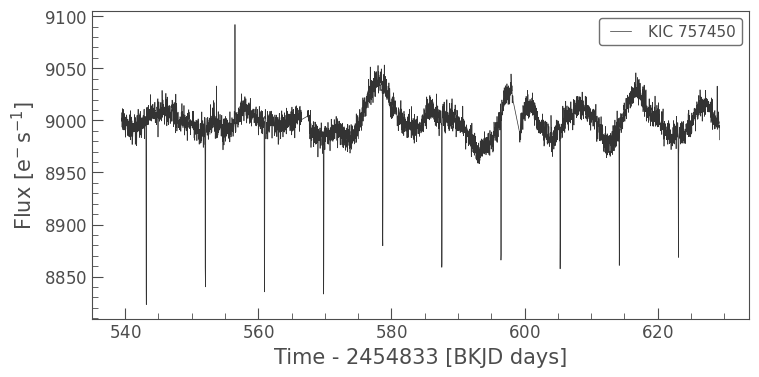

In [5]:
%matplotlib inline
lc.plot()

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

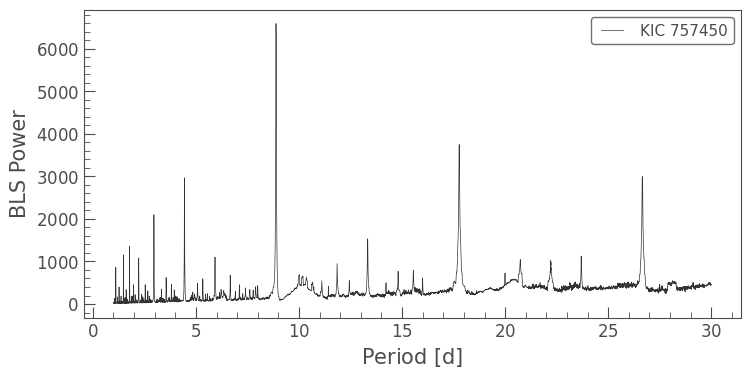

In [6]:
import numpy as np
# Create array of periods to search
period = np.linspace(1, 30, 5000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot()



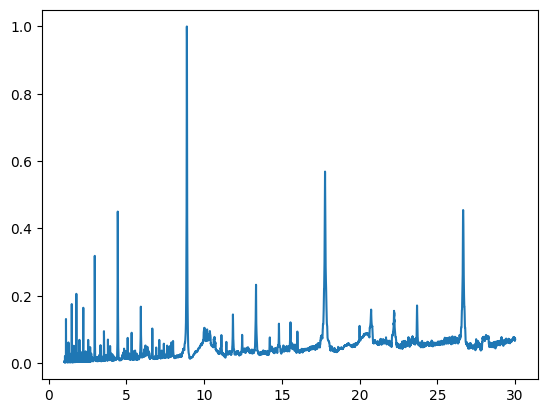

In [7]:
import matplotlib.pyplot as plt 
a = bls.power / bls.max_power
plt.plot(period, a)

In [8]:
lc = lk.read(not_transit_path + lc_not_transit_files[546])

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

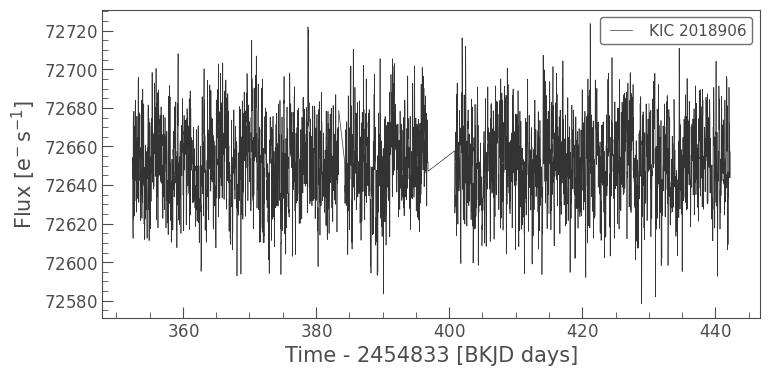

In [9]:
lc.plot()

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

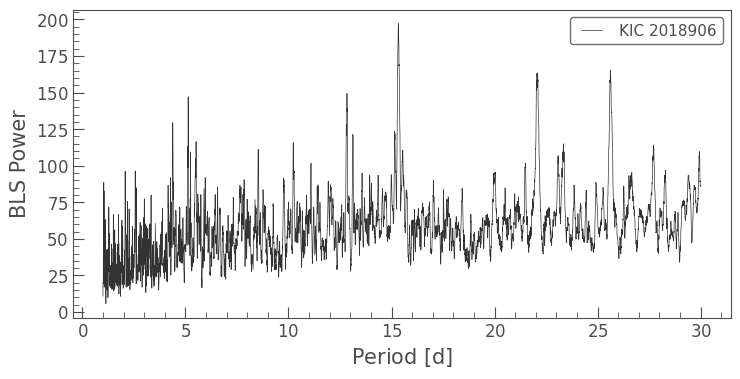

In [10]:
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot()


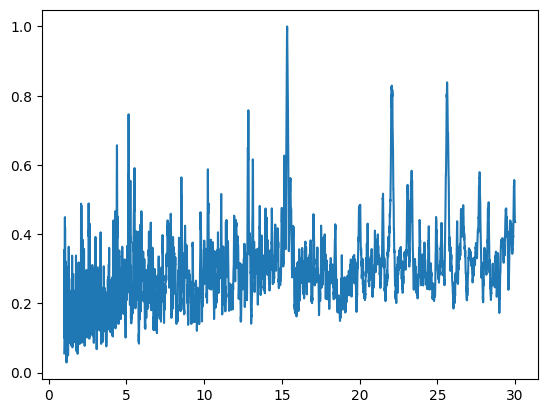

In [11]:
a = bls.power / bls.max_power
plt.plot(period, a)

# Guardado de datos en diccionario

In [18]:
lc = lk.read(planet_path + lc_planet_files[23])
lc.label

'KIC 1161345'

Text(0, 0.5, 'Normalized Flux')

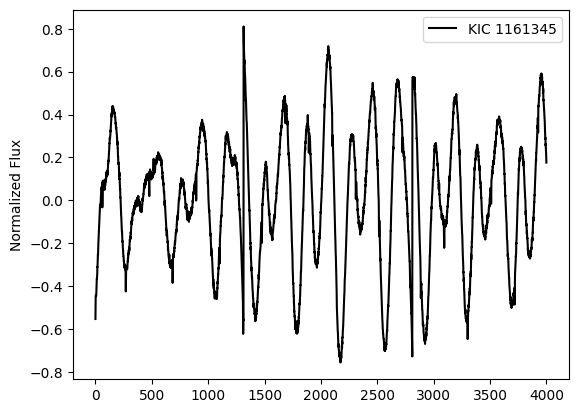

In [21]:
flatten_lc = lc.remove_nans().flatten(window_length=401)
flux = np.array((flatten_lc.flux.value[0:4000] - 1)*100)
plt.plot(range(4000), flux, label=lc.label, color="black")
plt.legend()
plt.ylabel("Normalized Flux")

In [14]:
import json
a = {
    "name" : "patata",
    "valores" : [1,2,3,4,5]
}

In [15]:
json_file = "Positivos.json"
data_folder = "../Data/Positive/"
is_planet = 1 # 1=Planeta, 0=No Planeta

#Periodos de tránsito que se buscaran
period = np.linspace(1, 30, 5000)

fits_list = os.listdir(data_folder)
fits_list = fits_list[:5]

#Inicio del json
with open(json_file, "a") as outfile:
    outfile.write('[\n')


#Escritura de los documentos
first_value = True
for fits_file in fits_list:

    #Comprueba primero si el fichero cumple los requesitos
    lc = lk.read(data_folder + fits_file)
    lc_lenght = len(lc)

    if (lc_lenght >= 4100):
        
        #Array de flujo normalizado
        flatten_lc = lc.remove_nans().flatten(window_length=401)
        lc_flux = np.array((flatten_lc.flux.value[0:4000] - 1)*100)
        flux = []
        for value in lc_flux:
            flux.append(value.item())

        #Array de periodos
        bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
        lc_power = np.array(bls.power / bls.max_power)

        power = []
        for value in lc_power:
            power.append(value.item())

        #Creación del documento
        documento = {
            "name" : lc.label,
            "is_planet" : is_planet,
            "flux" : flux,
            "power" : power
        }

        with open(json_file, "a") as outfile:
            #Chequea si es la primera vez que se escribe en el json
            if first_value:
                first_value = False
            else:
                outfile.write(',\n')


            #Creación del documento que se va a imprimir
            json.dump(documento, outfile)

#Cierre del json
with open(json_file, "a") as outfile:
    outfile.write('\n]')


In [16]:
a = np.ndarray(shape=(2,2), dtype=float, order='F')
a[0,0].item()

7.455e-321